### Classifying movie reviews: a binary classification

#### Import all the required libs


In [1]:
from keras.datasets import imdb
import numpy as np

/home/ouser/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Loading the IMDB dataset

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
word_index = imdb.get_word_index()

In [4]:
len(word_index)

88584

In [5]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
reverse_word_index.get(5 - 3, '?')

'and'

In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
print(train_labels[0])

1


In [9]:
len(train_data[0])

218

In [10]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [11]:
train_data.shape

(25000,)

### Preparing the data

#### Encoding the integer sequences into a binary matrix

In [12]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [13]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
x_train.shape

(25000, 10000)

In [15]:
len(x_train[0])

10000

In [16]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [18]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [19]:
y_train[1]

0.0

#### The model definition

In [54]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(128, activation='tanh'))
#model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [56]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Compiling the model, Configuring the optimizer and choosing metrics

In [67]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

#### Training the model

In [68]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.0455 - acc: 0.9461 - val_loss: 0.0878 - val_acc: 0.8818
Epoch 2/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.0354 - acc: 0.9620 - val_loss: 0.0863 - val_acc: 0.8810
Epoch 3/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.0291 - acc: 0.9705 - val_loss: 0.0838 - val_acc: 0.8861
Epoch 4/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.0248 - acc: 0.9769 - val_loss: 0.0858 - val_acc: 0.8829
Epoch 5/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.0219 - acc: 0.9795 - val_loss: 0.0883 - val_acc: 0.8800
Epoch 6/20
15000/15000 [==============================] - 1s 73us/step - loss: 0.0171 - acc: 0.9863 - val_loss: 0.0894 - val_acc: 0.8811
Epoch 7/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.0155 - acc: 0.9868 - val_loss: 0.0911 - val_ac

In [ ]:
history_dict = history.history

In [ ]:
history_dict.keys()

#### Plotting the training and validation loss

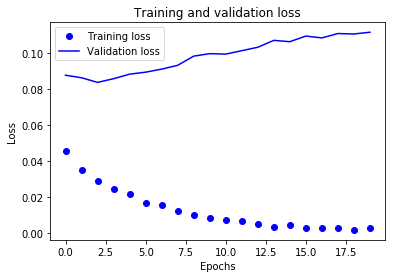

In [69]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(20)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### Plotting the training and validation accuracy

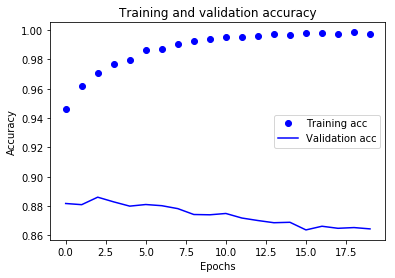

In [70]:
plt.clf()
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Retraining a model from scratch for fixing the overfitting

In [75]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=2, batch_size=512)


Epoch 1/2
15000/15000 [==============================] - 1s 89us/step - loss: 0.5102 - acc: 0.8037
Epoch 2/2
15000/15000 [==============================] - 1s 48us/step - loss: 0.3070 - acc: 0.9026


In [76]:
results = model.evaluate(x_val, y_val)

10000/10000 [==============================] - 1s 72us/step


In [77]:
results

[0.3085487654685974, 0.8852]

#### Using a trained network to generate predictions on new data

In [78]:
model.predict(x_test)

array([[0.41963464],
       [0.9919179 ],
       [0.8919397 ],
       ...,
       [0.20157461],
       [0.34836933],
       [0.57636636]], dtype=float32)

In [79]:
y_test[1]

1.0